data camp exercise

In [2]:
import pandas as pd

data = pd.read_csv('/Users/panoskolyvakis/PythonForData/data.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
# inspect whether there are missing values
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [84]:
cols = list(data.columns)
for c in cols:
    
    print('{} : {} '.format(c, data[c].unique()))

model : [' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser'] 
year : [2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998] 
price : [16000 15995 13998 ...  4950  4849  4985] 
transmission : ['Manual' 'Automatic' 'Semi-Auto' 'Other'] 
mileage : [24089 18615 27469 ... 36154 60700 45128] 
fuelType : ['Petrol' 'Other' 'Hybrid' 'Diesel'] 
tax : [265 145 150 260 200 250 140 135 235 300 125  20 160 165 205 240 330 325
   0  30 120 155 115 190  10 305 565 555 540] 
mpg : [ 36.2  33.2  32.8  39.8  85.6  36.7  72.4  39.2  78.5  58.9  53.3  62.8
  56.5  57.7  37.2  34.5  35.3  40.4  51.1  57.6  60.1  55.4  42.2  43.5
  53.   49.6  52.3  48.7  42.8  47.1  38.2  31.4  32.1  30.4  47.9  78.
  76.3  58.   65.7  55.   86.   66.   80.7  51.4  67.3  74.3  42.9  54.3
  50.4  37.7  44.8  76.4  70.6  61.4  46.3 

In [86]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['transmission_num']  = LE.fit_transform(data['transmission'])
data['fueltype_num']  = LE.fit_transform(data['fuelType'])
data['model_num']  = LE.fit_transform(data['model'])
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,transmission_num,fueltype_num,model_num
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,1,3,6
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,1,3,6
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,1,3,6
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,1,3,6
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,1,3,6


In [7]:
data_num = data.drop(columns= ['transmission' ,'fuelType', 'model'], axis =1 )


In [8]:
corr = data_num.corr()

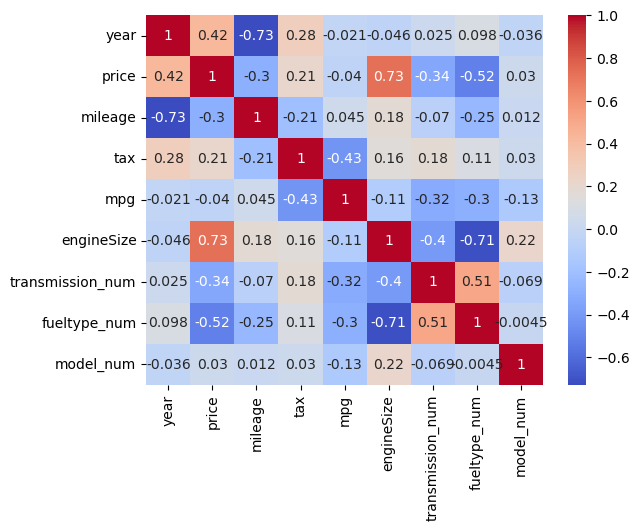

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

In [10]:

X = data_num[['year' , 'mileage' , 'tax' , 'engineSize' , 'transmission_num' , 'fueltype_num']]
Y = data_num['price']

# deal with data splitting
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.33 , random_state= 40)


# fit a simple linear regression
import statsmodels.api as sm

x_train = sm.add_constant(x_train)

#fit the model
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2397.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:40:20   Log-Likelihood:                -42683.
No. Observations:                4514   AIC:                         8.538e+04
Df Residuals:                    4507   BIC:                         8.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.765e+06   6.43e+04  

In [76]:
def percentage_diff(r1 , r2):
    diffs = []
    for i in range(len(r1)):

        result = abs(r1-r2)/ r1
        diffs.append(result)

    return result.mean()*100

In [77]:
x_test = sm.add_constant(x_test)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(y_pred.head())


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_linearReg = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test , y_pred)
rmse_linearReg = mse_linearReg**0.5

print(mse_linearReg , rmse_linearReg , r2_linear)

print('the percentage diff is {}'.format(percentage_diff(y_test, y_pred)))


5632     9206.025896
3697     6821.594912
2421    13200.586597
4266     7786.489007
5012     6190.778906
dtype: float64
9261298.48493259 3043.238157774148 0.7719240613319707
the percentage diff is 20.543573661510532


In [78]:
# random forest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
RandomForestModel = RandomForestRegressor(n_estimators =100, random_state= 42)

RandomForestModel.fit(x_train, y_train)

y_pred_forest = RandomForestModel.predict(x_test)

mse = mean_squared_error(y_test, y_pred_forest)
rmse = mse **0.5

r2 = r2_score(y_test , y_pred_forest)
print(mse , rmse)
print(r2)
import numpy as np

print(y_test)

print('the percentage diff is {}'.format(percentage_diff(y_test, y_pred_forest)))



3219169.3636979274 1794.2043818076934
0.920722231817571
5632    13998
3697     6998
2421     9995
4266     9495
5012     6701
        ...  
2786     8991
1006     7495
4886     7995
71      19500
84      22990
Name: price, Length: 2224, dtype: int64
the percentage diff is 9.853992218387575


In [79]:
# support vector machines 

from sklearn.svm import SVR

modelSVR = SVR(kernel = 'rbf' , C = 110 , gamma = 1 , epsilon = 1)

modelSVR.fit(x_train, y_train)

y_predSVR = modelSVR.predict(x_test)

mseSVR = mean_squared_error( y_predSVR, y_test)
rmseSVR = mseSVR **0.5
r2_SVR = r2_score(y_predSVR, y_test)

print(mseSVR, rmseSVR, r2_SVR)
print('the percentage diff is {}'.format(percentage_diff(y_test, y_predSVR)))

43021212.8733519 6559.055791297395 -31098.361675751185
the percentage diff is 39.99263495109497


In [80]:
# gradient boosting regression

from sklearn.ensemble import GradientBoostingRegressor

modelGBR = GradientBoostingRegressor(n_estimators=100 , max_depth=4 , learning_rate = 0.2 , loss = 'ls')

modelGBR.fit(x_train , y_train)
y_predGBR = modelGBR.predict(x_test)

mseGBR = mean_squared_error(y_predGBR , y_test)
rmse_GBR = mseGBR **0.5
r2_GBR = r2_score(y_predGBR , y_test)
print(mseGBR , rmse_GBR, r2_GBR)
print('the percentage diff is {}'.format(percentage_diff(y_test, y_predGBR)))



/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


2488149.26316191 1577.3868463892775 0.9347330141559369
the percentage diff is 8.874592260676138


In [81]:
import tensorflow 
import keras

model_neural = keras.models.Sequential()
model_neural.add(keras.layers.Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model_neural.add(keras.layers.Dense(5, activation = 'relu'))

model_neural.add(keras.layers.Dense(1, activation = 'linear'))

model_neural.compile(loss = 'mean_squared_error' , optimizer= 'adam')
model_neural.fit(x_train , y_train, epochs = 100, batch_size = 32, verbose = 0)

y_pred_neural = model.predict(x_test)
print(y_pred_neural)

mse_neural= mean_squared_error(y_pred_neural , y_test)
rmse_neural = mse_neural **0.5
r2_neural = r2_score(y_pred_neural , y_test)
print(mse_neural , rmse_neural,r2_neural)

print('the percentage diff is {}'.format(percentage_diff(y_test, y_pred_neural)))

5632     9206.025896
3697     6821.594912
2421    13200.586597
4266     7786.489007
5012     6190.778906
            ...     
2786    10257.147682
1006    10045.017360
4886     8520.910698
71      18919.557798
84      19670.900317
Length: 2224, dtype: float64
9261298.48493259 3043.238157774148 0.7058522280097268
the percentage diff is 20.543573661510532


In [82]:
from sklearn.tree import DecisionTreeClassifier

model_tree_classifier = DecisionTreeClassifier()
model_tree_classifier.fit(x_train ,  y_train)
y_pred_model_tree_classifier = model_tree_classifier.predict(x_test)

from sklearn.metrics import mean_absolute_error


mse_tree_classifier= mean_squared_error(y_pred_model_tree_classifier , y_test)
rmse_tree_classifier = mse_neural **0.5
r2_tree_classifier = r2_score(y_pred_model_tree_classifier , y_test)
print(mse_tree_classifier, rmse_tree_classifier , r2_tree_classifier)

print('the percentage diff is {}'.format(percentage_diff(y_test, y_pred_model_tree_classifier)))



5988060.316546762 3043.238157774148 0.8524988776844195
the percentage diff is 12.25684314434551


In [115]:
# cross_validation for gradiaent boost regressor
y = data_num['price']
x = data_num.drop('price', axis = 1)


from sklearn.model_selection import KFold, cross_val_score , GridSearchCV

kf = KFold(n_splits = 5 , shuffle = True, random_state=42)

modelGBR = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 1.0]
}
cv_modelGBR = GridSearchCV(modelGBR ,param_grid=param_grid, cv= 5, scoring = 'neg_mean_squared_error')
cv_modelGBR.fit(x,y)

cv_scores = cross_val_score(modelGBR , x , y , cv = kf , scoring = 'neg_mean_squared_error')

print(cv_scores , cv_scores.mean() , cv_scores.std())


[-1616779.67032703 -1764451.50160149 -2020014.85979093 -1454291.75548791
 -1651088.45118371] -1701325.2476782151 187747.29262407456


In [113]:
print('best_hyperparameters:', cv_modelGBR.best_params_)
print('Negative mean squared error', cv_modelGBR.best_score_)

best_hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Negative mean squared error -6304450.483508883


In [119]:

from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
modelGBR = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, n_estimators = 200, loss = 'ls')

modelGBR.fit(x_train , y_train)
y_predGBR = modelGBR.predict(x_test)

mseGBR = mean_squared_error(y_predGBR , y_test)
rmse_GBR = mseGBR **0.5
mae = np.mean(np.abs(y_predGBR - y_test))
r2_GBR = r2_score(y_predGBR , y_test)
print(mseGBR , rmse_GBR, r2_GBR)
print('the percentage diff is {}'.format(percentage_diff(y_test, y_predGBR)))
print(mae)

/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


194.57050926947753 13.948853331707145 0.9999948615627883
the percentage diff is 0.008602025729306358
0.8635317049846333


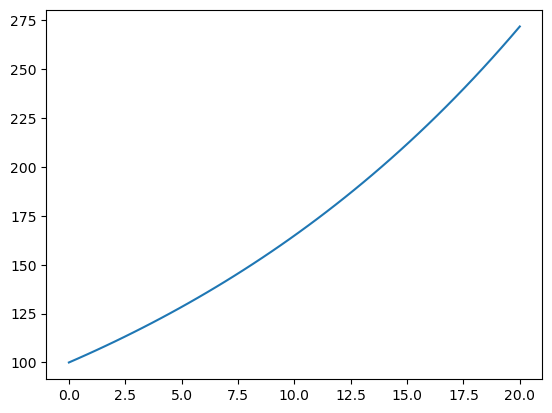

271.8281828459045

In [127]:
x_values= np.linspace(0,20)

initial_1 = 100
initial_5 = 500
percentage_return = 0.05
import math
def plot_graph (initial , x_values, percentage_return):
    y_values = []
    for time in x_values:
        result =  initial *math.exp(time * percentage_return)
        y_values.append(result)
    plt.plot(x_values , y_values)
    plt.show()
    return y_values[-1]

plot_graph(initial=initial_1 , x_values= x_values , percentage_return=percentage_return)




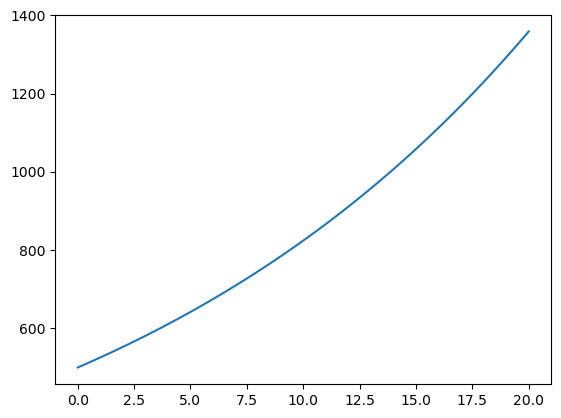

291.8

In [129]:
plot_graph(initial=initial_5 , x_values= x_values , percentage_return=percentage_return)
1459/5